In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import sklearn
from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pickle
import bz2

### Reading in Files

In [59]:
punches = pd.read_csv('punches.csv', sep=',')
waves   = pd.read_csv('waves.csv', sep=',')

### Creating some variables

In [92]:
num_samples = 150
time_axis = np.arange(0,1.5, 0.01)   # the recordings are taken over 1.5 seconds at 100 samples a second
print("Number of Examples in punches.csv: ", punches['GX'].size/num_samples)
print("Number of Examples in waves.csv: ", waves['GX'].size/num_samples)

Number of Examples in punches.csv:  99.0
Number of Examples in waves.csv:  77.0


### Defining some Functions

In [4]:
def centre(plot):
    return (np.sum([np.abs(m)*i for m, i in zip(plot, range(len(plot)))])/np.sum(np.abs(plot)))

def centreplot(plot):
    return np.roll(plot, int(len(plot)/2 - centre(plot))) 

In [5]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

### Plotting Our Data

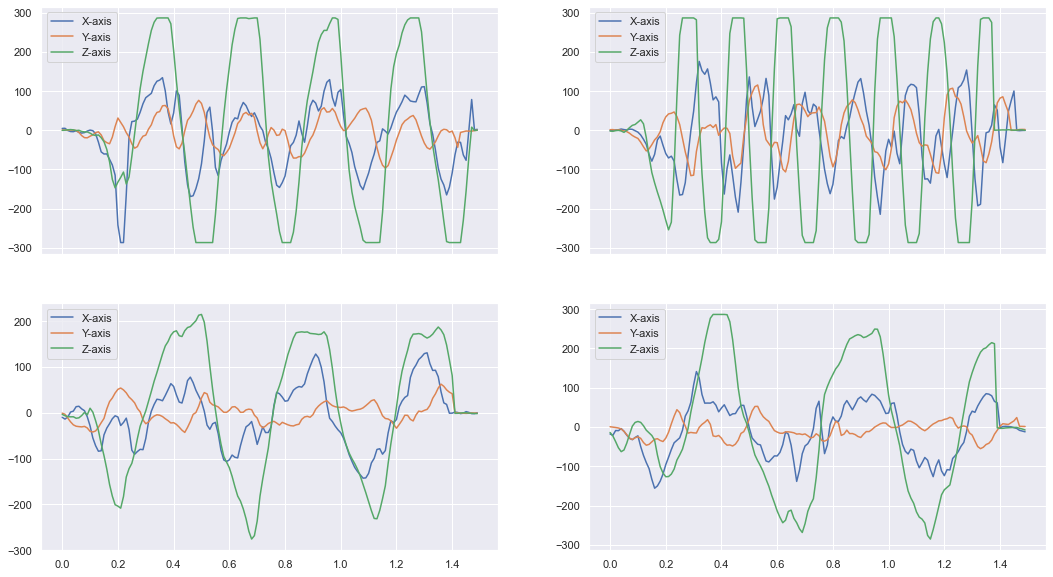

In [94]:
fig, ax = plt.subplots(2, 2, figsize=(18, 10), sharex=True)

for i in range(2):
    for j in range(2):       
        data = myFile["GX"][num_samples*(2*i + j):num_samples*(2*i + j) + num_samples]
        data_filtered = butter_highpass_filter(data, 0.1, 100)
        sns.lineplot(x=time_axis, y=np.roll(data, int(len(data)/2 - centre(data_filtered))) , ax = ax[j,i], label="X-axis")

        data = myFile["GY"][num_samples*(2*i + j):num_samples*(2*i + j) + num_samples]
        data_filtered = butter_highpass_filter(data, 0.1, 100)
        sns.lineplot(x=time_axis, y=np.roll(data, int(len(data)/2 - centre(data_filtered))) , ax = ax[j,i], label="Y-axis")
        
        data = myFile["GZ"][num_samples*(2*i + j):num_samples*(2*i + j) + num_samples]
        data_filtered = butter_highpass_filter(data, 0.1, 100)
        sns.lineplot(x=time_axis, y=np.roll(data, int(len(data)/2 - centre(data_filtered))) , ax = ax[j,i], label="Z-axis")



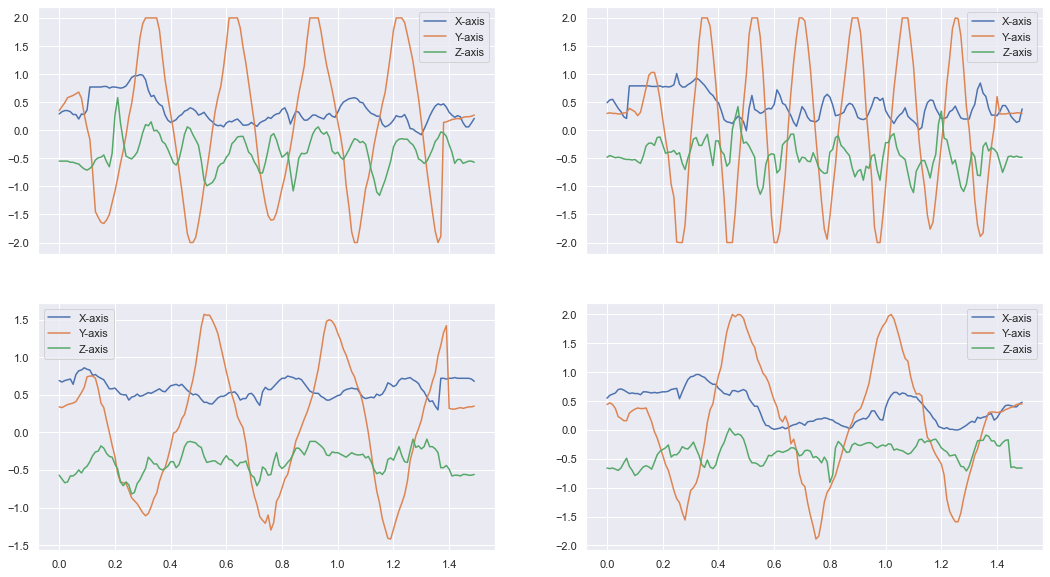

In [95]:
fig, ax = plt.subplots(2, 2, figsize=(18, 10), sharex=True)

for i in range(2):
    for j in range(2):
        data = myFile["AX"][num_samples*(2*i + j):num_samples*(2*i + j) + num_samples]
        data_filtered = butter_highpass_filter(data, 0.1, 100)
        sns.lineplot(x=time_axis, y=np.roll(data, int(len(data)/2 - centre(data_filtered))) , ax = ax[j,i], label="X-axis")

        data = myFile["AY"][num_samples*(2*i + j):num_samples*(2*i + j) + num_samples]
        data_filtered = butter_highpass_filter(data, 0.1, 100)
        sns.lineplot(x=time_axis, y=np.roll(data, int(len(data)/2 - centre(data_filtered))) , ax = ax[j,i], label="Y-axis")
        
        data = myFile["AZ"][num_samples*(2*i + j):num_samples*(2*i + j) + num_samples]
        data_filtered = butter_highpass_filter(data, 0.1, 100)
        sns.lineplot(x=time_axis, y=np.roll(data, int(len(data)/2 - centre(data_filtered))) , ax = ax[j,i], label="Z-axis")


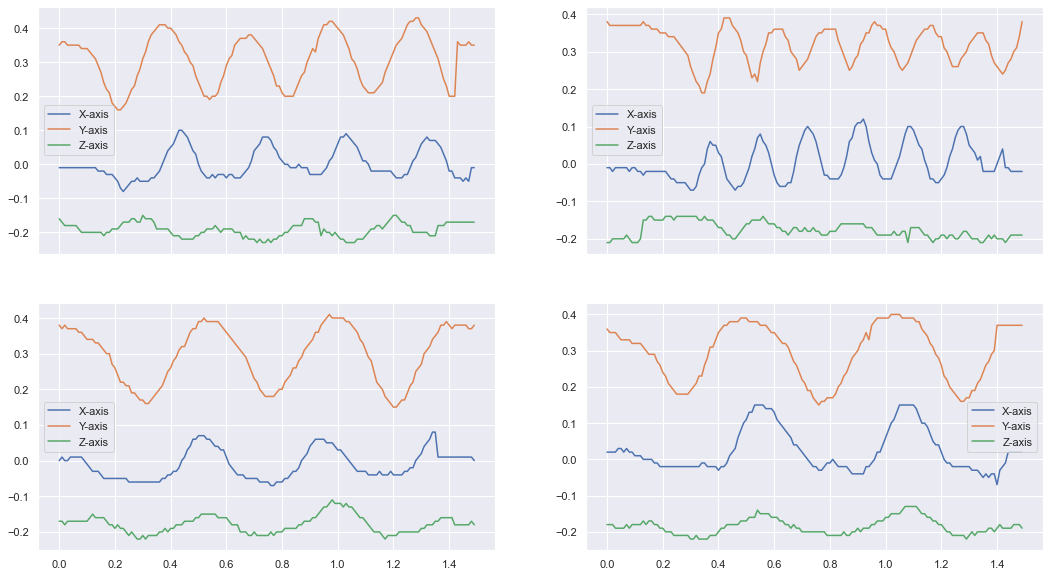

In [96]:
fig, ax = plt.subplots(2, 2, figsize=(18, 10), sharex=True)

for i in range(2):
    for j in range(2):
        data = myFile["MX"][num_samples*(2*i + j):num_samples*(2*i + j) + num_samples]
        data_filtered = butter_highpass_filter(data, 0.1, 100)
        sns.lineplot(x=time_axis, y=np.roll(data, int(len(data)/2 - centre(data_filtered))) , ax = ax[j,i], label="X-axis")

        data = myFile["MY"][num_samples*(2*i + j):num_samples*(2*i + j) + num_samples]
        data_filtered = butter_highpass_filter(data, 0.1, 100)
        sns.lineplot(x=time_axis, y=np.roll(data, int(len(data)/2 - centre(data_filtered))) , ax = ax[j,i], label="Y-axis")
        
        data = myFile["MZ"][num_samples*(2*i + j):num_samples*(2*i + j) + num_samples]
        data_filtered = butter_highpass_filter(data, 0.1, 100)
        sns.lineplot(x=time_axis, y=np.roll(data, int(len(data)/2 - centre(data_filtered))) , ax = ax[j,i], label="Z-axis")


### Combining all the data

At the moment we have 9 seperate arrays each containing 150 samples
However, we need to input this data into a neural network somehow,
and so we need to flatten out these arrays into a single array containing 150*9 = 1350 samples

To do this we'll write a function which takes in a dictionary and the index to take 

In [81]:
def allData(x, i):
    all_data = []
    for key, value in x.items():
        value = value[num_samples*(i) : num_samples*(i) + num_samples]
        data_filtered = butter_highpass_filter(value, 0.1, 100)
        data = np.roll(value, int(len(value)/2 - centre(data_filtered)))
        data = [float(k)/max(abs(data)) for k in data]
        all_data = [*all_data, *data]
        
    return all_data

In [84]:
all_examples = [allData(waves, i) for i in range(int(waves['GX'].size/num_samples))]
all_examples += [allData(punches, i) for i in range(int(punches['GX'].size/num_samples))]

all_labels = [0 if i<int(waves['GX'].size/num_samples) else 1 for i in range(len(all_examples))]

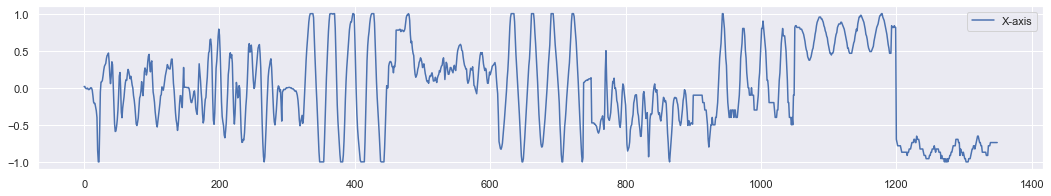

In [85]:
fig, ax = plt.subplots(figsize=(18, 3))
sns.lineplot(x=range(len(all_examples[0])), y=all_examples[0] , ax = ax)
import seaborn as sns

In [97]:
print(len(all_examples), "Rows and", len(all_examples[0]), "Columns")

176 Rows and 1350 Columns


#### Split the `all_examples` and `all_labels` into a train and test set

This allows us to train the model with the training set and test it with the test set

In [98]:
X_train, X_test, y_train, y_test = train_test_split(all_examples, all_labels, test_size=0.5)

#### Create a neural network with three hidden layers, each hidden layer containing 1350 nodes

A good rule of thumb for choosing the number of nodes in a hidden layer is to choose a number similar to the input layer size

In [100]:
clf = MLPClassifier(hidden_layer_sizes=(1350, 1350, 1350))


#### Train the model with the training data

In [108]:
clf.fit(X_train, y_train);


#### Test the model with the test set 

In [109]:
print(str(clf.score(X_test, y_test)*100.0) + '%', 'accuracy')


98.86363636363636% accuracy


#### Save the model as a file

This allows us to import the pre-trained model when making predictions

In [3]:
# save to s
# with open('classifier.model', 'wb') as classifier:
#     s = pickle.dump(clf, classifier)

with open('classifier.model', 'rb') as classifier: 
    clf = pickle.load(classifier)
    
with bz2.BZ2File('classifier.pbz2', 'w') as f: 
    pickle.dump(clf, f)